# 色々な確率分布

* 黒木玄
* 2022-04-11～2022-04-12
$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#正規分布" data-toc-modified-id="正規分布-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>正規分布</a></span><ul class="toc-item"><li><span><a href="#正規分布のロケーションスケール変換も正規分布" data-toc-modified-id="正規分布のロケーションスケール変換も正規分布-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>正規分布のロケーションスケール変換も正規分布</a></span></li><li><span><a href="#問題:-正規分布の平均と分散" data-toc-modified-id="問題:-正規分布の平均と分散-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>問題: 正規分布の平均と分散</a></span></li><li><span><a href="#問題:-正規分布に従う独立な確率変数達の和も正規分布に従う" data-toc-modified-id="問題:-正規分布に従う独立な確率変数達の和も正規分布に従う-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>問題: 正規分布に従う独立な確率変数達の和も正規分布に従う</a></span></li><li><span><a href="#問題:-正規分布における確率がほぼ95%または99%になる区間" data-toc-modified-id="問題:-正規分布における確率がほぼ95%または99%になる区間-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>問題: 正規分布における確率がほぼ95%または99%になる区間</a></span></li><li><span><a href="#問題:-対数正規分布の確率密度函数" data-toc-modified-id="問題:-対数正規分布の確率密度函数-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>問題: 対数正規分布の確率密度函数</a></span></li></ul></li><li><span><a href="#Poisson分布" data-toc-modified-id="Poisson分布-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Poisson分布</a></span><ul class="toc-item"><li><span><a href="#二項分布の連続時間極限" data-toc-modified-id="二項分布の連続時間極限-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>二項分布の連続時間極限</a></span></li></ul></li><li><span><a href="#ガンマ分布" data-toc-modified-id="ガンマ分布-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ガンマ分布</a></span><ul class="toc-item"><li><span><a href="#負の二項分布の連続時間極限" data-toc-modified-id="負の二項分布の連続時間極限-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>負の二項分布の連続時間極限</a></span></li><li><span><a href="#χ²分布" data-toc-modified-id="χ²分布-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>χ²分布</a></span></li></ul></li><li><span><a href="#ベータ分布" data-toc-modified-id="ベータ分布-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ベータ分布</a></span><ul class="toc-item"><li><span><a href="#一様分布の順序統計量" data-toc-modified-id="一様分布の順序統計量-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>一様分布の順序統計量</a></span></li><li><span><a href="#t分布" data-toc-modified-id="t分布-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>t分布</a></span></li><li><span><a href="#F分布" data-toc-modified-id="F分布-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>F分布</a></span></li><li><span><a href="#二項分布とベータ分布の累積分布函数の関係" data-toc-modified-id="二項分布とベータ分布の累積分布函数の関係-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>二項分布とベータ分布の累積分布函数の関係</a></span></li></ul></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using BenchmarkTools
using Distributions
using Printf
using QuadGK
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, titlefontsize = 10, size = (400, 250))
using SymPy

## 正規分布

$\mu, \sigma\in\R$, $\sigma > 0$ と仮定する.  確率密度函数

$$
p(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

で定義される連続分布を平均 $\mu$, 分散 $\sigma^2$ (標準偏差 $\sigma$)の __正規分布__ (normal distribution)と呼び, $\op{Normal}(\mu,\sigma)$ と書くのであった.

さらに, 平均 $0$, 分散 $1^2$ の正規分布を __標準正規分布__ (standard normal distribution)と呼び, $\op{Normal}()$ と書くのであった. 標準正規分布の密度函数は次の形になる:

$$
p(z) = \frac{e^{-z^2/2}}{\sqrt{2\pi}}.
$$

### 正規分布のロケーションスケール変換も正規分布

$a,b\in\R$, $a\ne 0$ と仮定する. 一般に確率変数 $X$ について,

$$
E[aX+b] = aE[X]+b, \quad \var(aX+b) = a^2\var(X)
$$

が成立するのであった.  $X$ が正規分布に従う確率変数の場合には $aX+b$ も正規分布に従うことを示せる. 実際, $X\sim\op{Normal}(\mu,\sigma)$ のとき, $y = ax + b$ すなわち $x = (y - b)/a$ とおくと,

$$
\begin{aligned}
E[f(aX+b)] &=
\frac{1}{\sqrt{2\pi\sigma^2}}
\int_{-\infty}^\infty f(ax+b) \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,dx
\\ &=
\frac{1}{\sqrt{2\pi\sigma^2}}
\int_{-\infty}^\infty f(y) \exp\left(-\frac{((y-b)/a-\mu)^2}{2\sigma^2}\right)\,\frac{dy}{|a|}
\\ &=
\frac{1}{\sqrt{2\pi(a^2\sigma)^2}}
\int_{-\infty}^\infty f(y) \exp\left(-\frac{(y-(a\mu+b))^2}{2a^2\sigma^2}\right)\,dy
\end{aligned}
$$

なので, $aX+b$ は平均 $a\mu+b$, 分散 $a^2\sigma^2$ の正規分布に従う: $aX+b\sim\op{Normal}(a\mu + b, |a|\sigma)$.

### 問題: 正規分布の平均と分散

分布 $\op{Normal}(\mu, \sigma)$ の平均と分散がそれぞれ $\mu$, $\sigma^2$ になることを示せ.

__解答例1:__ すでに標準正規分布 $\op{Normal}(0,1)$ の平均と分散がそれぞれ $0$ と $1^2$ になることは示してある. $X \sim \op{Normal}(\mu, \sigma)$ のとき, $Z = (X - \mu)/\sigma$ とおくと $Z\sim\op{Normal}((\mu-\mu)/\sigma, \sigma/\sigma) = \op{Normal}(0, 1)$ となるので, $X = \sigma Z + \mu$ の平均と分散はそれぞれ $\sigma\cdot0+\mu=\mu$, $\sigma^2\cdot 1^2 = \sigma^2$ になる.

__解答終__

__解答例2:__ 直接的に計算してみよう. $X \sim \op{Normal}(\mu, \sigma)$ のとき, 積分変数を $x = \sigma z + \mu$ と変換すると,

$$
E[X] =
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^\infty x e^{-(x-\mu)^2/(2\sigma^2)}\,dx =
\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty (\sigma z+\mu) e^{-z^2/2}\,dz =
\mu.
$$
最後の等号で $\int_{-\infty}^\infty z e^{-z^2/2}\,dz = 0$ と $\int_{-\infty}^\infty e^{-z^2/2}\,dy = \sqrt{2\pi}$ を使った.  この結果を使うと,

$$
\op{var}(X) = E[(X-\mu)^2] =
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^\infty (x-\mu)^2 e^{-(x-\mu)^2/(2\sigma^2)}\,dx =
\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty \sigma^2 z^2 e^{-z^2/2}\,dx = \sigma^2.
$$

最後の等号で $\int_{-\infty}^\infty z^2 e^{-z^2/2}\,dz = \sqrt{2\pi}$ を使った. この結果は

$$
\int_{-\infty}^\infty e^{-\alpha z^2}\,dz = \sqrt{\pi}\,\alpha^{-1/2}
$$

の両辺を $\alpha$ で微分して $-1$ 倍して $\alpha=1/2$ とおいても得られるし, ガンマ函数に帰着する方法でも得られる.

__解答終__

### 問題: 正規分布に従う独立な確率変数達の和も正規分布に従う

$X$, $Y$ はともに正規分布に従う独立な確率変数達であるとき, $X+Y$ も正規分布に従うことを示せ.  $X+Y$ の平均と分散は $X$, $Y$ の平均と分散でどのように表されるか?

__解答例:__ $X\sim\op{Normal}(\mu_X, \sigma_X)$, $Y\sim\op{Normal}(\mu_Y, \sigma_Y)$ でかつ $X,Y$ は独立であると仮定する.

$X,Y$ は独立なので $X+Y$ の平均と分散はそれぞれ $\mu_X + \mu_Y$, $\sigma_X^2 + \sigma_Y^2$ になる.

$X'=X-\mu_X$, $Y'=Y-\mu_Y$ とおくと, $X'\sim\op{Normal}(0,\sigma_X)$, $Y\sim\op{Normal}(0,\sigma_Y)$, $X+Y = (X'+Y') + (\mu_X+\mu_Y)$ となるので, $X'+Y'$ が正規分布に従うことを示せば十分である.  ゆえに $\mu_X=0$, $\mu_Y=0$ と仮定してよいので, そのように仮定する. 

$X+Y$ の確率密度函数を計算して, それが正規分布の密度函数になっていることを示せばよい. 

$$
E[f(X+Y)] =
\frac{1}{\sqrt{(2\pi)^2\sigma_X^2\sigma_Y^2}}
\iint_{\R^2} f(x+y) \exp\left(-\frac{1}{2}\left(
\frac{x^2}{\sigma_X^2}+\frac{y^2}{\sigma_Y^2}
\right)\right)\,dx\,dy
$$

であり, $x = x + y$ すなわち $y = z - x$ とおいて, $x$ について平方完成すると,

$$
\frac{x^2}{\sigma_X^2}+\frac{y^2}{\sigma_Y^2} =
\frac{x^2}{\sigma_X^2}+\frac{(z-x)^2}{\sigma_Y^2} =
\frac{\sigma_X^2+\sigma_Y^2}{\sigma_X^2\sigma_Y^2}
\left(x - \frac{\sigma_X^2 z}{\sigma_X^2+\sigma_Y^2}\right)^2 +
\frac{z^2}{\sigma_X^2 + \sigma_Y^2}.
$$

となる(この計算を自分で実行してみること).  ゆえに,

$$
\begin{aligned}
&
E[f(X+Y)]
\\ &=
\frac{1}{\sqrt{(2\pi)^2\sigma_X^2\sigma_Y^2}}
\int_\R\left(\int_\R f(z) \exp\left(-
\frac{\sigma_X^2+\sigma_Y^2}{2\sigma_X^2\sigma_Y^2}
\left(x - \frac{\sigma_X^2 z}{\sigma_X^2+\sigma_Y^2}\right)^2 -
\frac{z^2}{2(\sigma_X^2 + \sigma_Y^2)}
\right)\,dx\right)\,dz
\\ &=
\frac{1}{\sqrt{(2\pi)^2\sigma_X^2\sigma_Y^2}}
\sqrt{\frac{2\pi\sigma_X^2\sigma_Y^2}{\sigma_X^2+\sigma_Y^2}}
\int_\R f(z) \exp\left( -\frac{z^2}{2(\sigma_X^2 + \sigma_Y^2)} \right)\,dz
\\ &=
\frac{1}{\sqrt{2\pi(\sigma_X^2+\sigma_Y^2)}}
\int_\R f(z) \exp\left( -\frac{z^2}{2(\sigma_X^2 + \sigma_Y^2)} \right)\,dz
\end{aligned}
$$

以上によって $X+Y\sim\op{Normal}(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)$ を示せた.

$z = x + y$, $y = z - x$ とおくと密度函数中の指数函数の中身が $z$ についでの二次式になることから, $Z = X+Y$ が正規分布に従うことは計算しなくても明らかだと考えることもできる. 上のように $z$ 以外の変数は積分して消せる.  そして, $Z=X+Y$ の期待値は $X,Y$ の期待値の和になり, $X,Y$ が独立という仮定からそれらは無相関になるので $Z=X+Y$ の分散は $X,Y$ の分散の和になることもわかる. これだけで $X+Y\sim\op{Normal}(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)$ を証明でいたともみなせる.

__解答終__

上の解答中の最も面倒な部分の計算が正しいことはコンピュータで以下のように確認できる.

$a=\sigma_X^2$, $b=\sigma_Y^2$ とおくと,

In [2]:
@vars a b x z
(a+b)/(a*b)*(x - a*z/(a+b))^2 + z^2/(a+b) - x^2/a - (z-x)^2/b |> simplify

0

以下のように素朴に計算することもできる.

In [3]:
@vars a b positive=true
@vars x y z t
expr = x^2/a + y^2/b

 2    2
y    x 
-- + --
b    a 

In [4]:
expr = expr(y=>z-x).expand()

 2            2    2
x    2*x*z   z    x 
-- - ----- + -- + --
b      b     b    a 

In [5]:
A, B = 1/a+1/b, z/b
expr = sympy.poly(expr(x => t + B/A), t) 

Poly((a + b)/(a*b)*t**2 + z**2/(a + b), t, domain='ZZ(z,a,b)')

In [6]:
# 以下のセルでの説明で使う図の準備

μ, σ, c = 2, 3, 1.5
normal = Normal(μ, σ)

P1 = plot(normal, μ - 4σ, μ + 4σ; label="Normal(μ,σ)", xlabel="x = σz + μ")
vline!([μ]; label="x=μ", xtick = ([μ-c*σ, μ, μ+c*σ], ["μ-cσ", "μ", "μ+cσ"]), ytick=false)
plot!(normal, μ - 4σ, μ - c*σ; label="", c=1, frange=0, fc=:red, fa=0.5)
plot!(normal, μ + c*σ, μ + 4σ; label="", c=1, frange=0, fc=:red, fa=0.5)
annotate!(μ - 1.3c*σ, 0.8pdf(normal, μ - c*σ), ("P(X≤μ-cσ)", 10, :red, :right))
annotate!(μ - 1.5c*σ, 0.5pdf(normal, μ - c*σ), ("= α/2", 10, :red, :right))
annotate!(μ + 1.5c*σ, 0.5pdf(normal, μ + c*σ), ("= α/2", 10, :red, :left))
annotate!(μ + 1.3c*σ, 0.8pdf(normal, μ + c*σ), ("1-P(X≥μ+cσ)", 10, :red, :left))

P2 = plot(Normal(), -4, 4; label="Normal(0,1)", xlabel="z = (x - μ)/σ")
vline!([0]; label="z=0", xtick = ([-c, 0, c], ["-c", "0", "c"]), ytick=false)
plot!(Normal(), -4, -c; label="", c=1, frange=0, fc=:red, fa=0.5)
plot!(Normal(),  c,  4; label="", c=1, frange=0, fc=:red, fa=0.5)
annotate!(-1.3c, 0.8pdf(Normal(), -c), ("P(Z≤-c)", 10, :red, :right))
annotate!(-1.5c, 0.5pdf(Normal(), -c), ("= α/2", 10, :red, :right))
annotate!( 1.5c, 0.5pdf(Normal(),  c), ("= α/2", 10, :red, :left))
annotate!( 1.3c, 0.8pdf(Normal(),  c), ("1-P(Z≥c)", 10, :red, :left))

var"P(μ-cσ ≤ X ≤ μ+cσ) = 1-α ⟺ 1 - P(Z ≤ c) = α/2" =
    plot(P1, P2; size=(800, 250), bottommargin=4Plots.mm);

### 問題: 正規分布における確率がほぼ95%または99%になる区間

$X \sim \op{Normal}(\mu, \sigma)$ であると仮定する.  このとき, $X$ が区間 $[\mu-c\sigma, \mu+c\sigma]$ に含まれる確率

$$
P(\mu-c\sigma \le X \le \mu+c\sigma)
$$

が $95\%$ になる $c$ と $99\%$ になる $c$ を小数点以下第2桁目まで求めよ.

__解答例:__ 標準正規分布の場合の計算に帰着することを考えよう.

$Z = (X - \mu)/\sigma$ とおくと $Z$ は標準正規分布に従うのであった: $Z \sim \op{Normal}(0,1)$. このとき,

$$
\mu-c\sigma \le X \le \mu+c\sigma \iff -c \le Z = \frac{X-\mu}{\sigma} \le c
$$

なので, 標準正規分布に従う確率変数 $Z$ について $P(-c \le Z \le c)$ が $95\%$ になる $c$ と $99\%$ になる $c$ を求めればよい.  正規分布は左右対称なので, $P(-c \le Z \le c) = 1 - \alpha$ となることと, $1 - P(Z \le c) = \alpha/2$ すなわち

$$
P(Z \le c) = 1 - \alpha/2
$$

となることは同値である. 下の図を見よ.

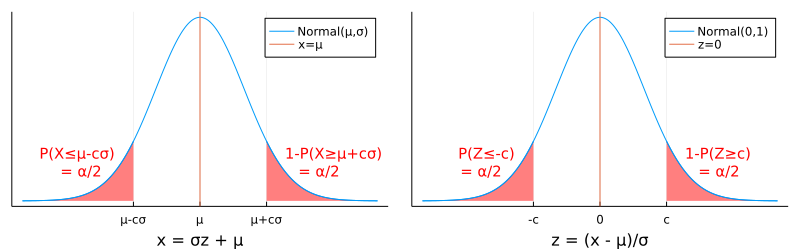

In [7]:
var"P(μ-cσ ≤ X ≤ μ+cσ) = 1-α ⟺ 1 - P(Z ≤ c) = α/2"

$F(z) = P(Z \le z)$ は標準正規分布の累積分布函数である. 標準正規分布の累積分布函数はコンピュータでの基本特殊函数ライブラリに含まれている誤差函数

$$
\op{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x \exp(-u^2) \,du
$$

を使えば

$$
F(z) = \frac{1 + \op{erf}(z/\sqrt{2})}{2}.
$$

と書けるのであった. ゆえに誤差函数の逆函数 $\op{erfinv}(y)$ (この函数のコンピュータでの基本特殊函数ライブラリに含まれている)を使えば, 標準正規分布の累積分布函数 $F(z)$ の逆函数(分位点函数)は

$$
Q(p) = F^{-1}(p) = \sqrt{2}\,\op{erfinv}(2p - 1)
$$

と書ける.  これを使えば $P(Z \le c) = 1 - \alpha/2$ となる $c$ を

$$
c = Q(1 - \alpha/2) = \sqrt{2}\,\op{erfinv}(1 - \alpha)
$$

と求めることができる.

* $1-\alpha=95\%$ のとき, $c = \sqrt{2}\,\op{erfinv}(1 - \alpha) \approx 1.96$
* $1-\alpha=99\%$ のとき, $c = \sqrt{2}\,\op{erfinv}(1 - \alpha) \approx 2.58$

__解答終__

[Julia言語](https://julialang.org/)では以下のように計算できる. (ただし, `using SpecialFunctions, Distributions` が必要.)

In [8]:
√2 * erfinv(0.95), quantile(Normal(), 0.975)

(1.9599639845400576, 1.9599639845400576)

In [9]:
√2 * erfinv(0.99), quantile(Normal(), 0.995)

(2.5758293035489053, 2.5758293035489053)

[WolframAlpha](https://www.wolframalpha.com/)では以下のように計算できる.

* [√2 erfinv(0.95)](https://www.wolframalpha.com/input?i=%E2%88%9A2+erfinv%280.95%29), [quantile(NormalDistribution(0,1), 0.975)](https://www.wolframalpha.com/input?i=quantile%28NormalDistribution%280%2C1%29%2C+0.975%2)
* [√2 erfinv(0.99)](https://www.wolframalpha.com/input?i=%E2%88%9A2+erfinv%280.99%29), [quantile(NormalDistribution(0,1), 0.995)](https://www.wolframalpha.com/input?i=quantile%28NormalDistribution%280%2C1%29%2C+0.995%29)

### 問題: 対数正規分布の確率密度函数

$X \sim \op{Normal}(\mu, \sigma)$ のときの $Y = e^X$ が従う分布を対数正規分布と呼び,

$$
\op{LogNormal}(\mu, \sigma)
$$

と表す. 対数正規分布の確率密度函数を求めよ.

__解答例:__ $x = \log y$ と積分変数を変換すると, $dx = dy/y$ なので,

$$
E[f(Y)] =
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^\infty
f(e^x) \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,dx =
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^\infty
f(y) \exp\left(-\frac{(\log y-\mu)^2}{2\sigma^2}\right)\,\frac{dy}{y}.
$$

ゆえに対数正規分布の確率密度函数は次の形になる:

$$
p(y) = \frac{1}{y\sqrt{2\pi\sigma^2}}
\exp\left(-\frac{(\log y-\mu)^2}{2\sigma^2}\right).
$$

__解答終__

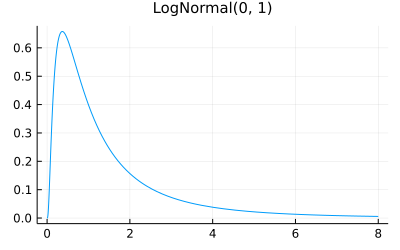

In [10]:
plot(LogNormal(0, 1), 0, 8; label="", title="LogNormal(0, 1)")

## Poisson分布

### 二項分布の連続時間極限

## ガンマ分布

### 負の二項分布の連続時間極限

### χ²分布

## ベータ分布

### 一様分布の順序統計量

### t分布

### F分布

### 二項分布とベータ分布の累積分布函数の関係